# [3주차 - Day5] Weekly Mission

## Mission 1. Netfilx and Code

In [1]:
import numpy as np
import pandas as pd

In [2]:
netflix_df = pd.read_csv('./Netflix_dataset/netflix_titles.csv')

netflix_df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


### Mandatory Part

In [3]:
# 한국 작품은 총 얼마나 있는가?

korean_videos = len(netflix_df[netflix_df['country'] == 'South Korea'])
print(f'한국 작품은 총: {korean_videos} 개 입니다.')

한국 작품은 총: 183 개 입니다.


### Bonus Part

In [4]:
# 가장 많은 작품이 올라간 국가는 어디이고, 얼마나 많은 작품이 있는가?

grouped_df = netflix_df.groupby('country').size().sort_values(ascending=False)

print(f'가장 많은 작품이 올라간 국가는: {grouped_df.index[0]} 입니다.')
print(f'작품의 숫자는: {grouped_df.values[0]}개 입니다.')

가장 많은 작품이 올라간 국가는: United States 입니다.
작품의 숫자는: 2555개 입니다.


## Misson 2. 가즈아!

In [94]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

### Mandatory Part

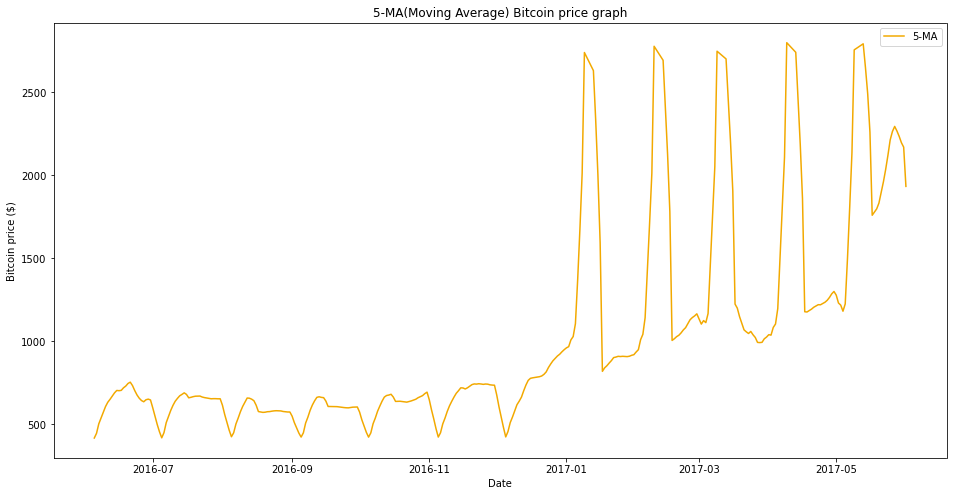

In [261]:
bitcoin_df = pd.read_csv('./Bitcoin_dataset/BitCoin.csv')
bitcoin_df = bitcoin_df[['Date', 'Open']]
bitcoin_df['Date'] = pd.to_datetime(bitcoin_df['Date'])
bitcoin_df = bitcoin_df.sort_values(by=['Date'], axis=0, ascending=True)

start_day, end_day = datetime.datetime(2016, 6, 1), datetime.datetime(2017, 6, 1)
bitcoin_df = bitcoin_df[(start_day <= bitcoin_df['Date']) & (bitcoin_df['Date'] <= end_day)]

ma5 = bitcoin_df['Open'].rolling(window=5).mean()
bitcoin_df.insert(len(bitcoin_df.columns), '5-MA', ma5)

plt.figure(figsize=(16, 8))
plt.plot(bitcoin_df['Date'], bitcoin_df['5-MA'], label='5-MA', color='#f2a900')
plt.title('5-MA(Moving Average) Bitcoin price graph')
plt.xlabel('Date')
plt.ylabel('Bitcoin price ($)')
plt.legend(loc="best")
plt.show()

### Bonus Part

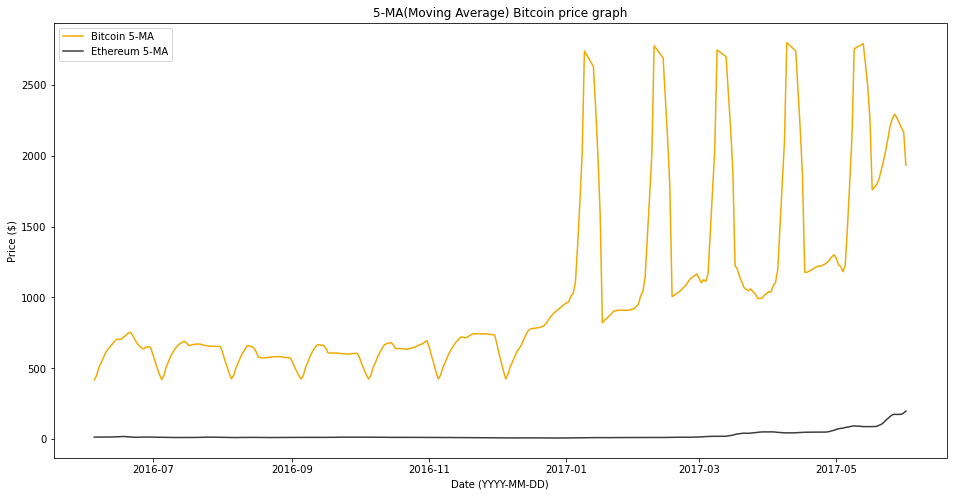

In [265]:
bitcoin_df = pd.read_csv('./Bitcoin_dataset/BitCoin.csv')
ethereum_df = pd.read_csv('./Ethereum_dataset/ETH_day.csv')

bitcoin_df = bitcoin_df[['Date', 'Open']]
ethereum_df = ethereum_df[['Date', 'Open']]
bitcoin_df['Date'] = pd.to_datetime(bitcoin_df['Date'])
ethereum_df['Date'] = pd.to_datetime(ethereum_df['Date'])
bitcoin_df = bitcoin_df.sort_values(by=['Date'], axis=0, ascending=True)
ethereum_df = ethereum_df.sort_values(by=['Date'], axis=0, ascending=True)

start_day, end_day = datetime.datetime(2016, 6, 1), datetime.datetime(2017, 6, 1)
bitcoin_df = bitcoin_df[(start_day <= bitcoin_df['Date']) & (bitcoin_df['Date'] <= end_day)]
ethereum_df = ethereum_df[(start_day <= ethereum_df['Date']) & (ethereum_df['Date'] <= end_day)]

bitcoin_ma5 = bitcoin_df['Open'].rolling(window=5).mean()
ethereum_ma5 = ethereum_df['Open'].rolling(window=5).mean()
bitcoin_df.insert(len(bitcoin_df.columns), 'Bitcoin 5-MA', bitcoin_ma5)
ethereum_df.insert(len(ethereum_df.columns), 'Ethereum 5-MA', ethereum_ma5)

plt.figure(figsize=(16, 8))
plt.plot(bitcoin_df['Date'], bitcoin_df['Bitcoin 5-MA'], label='Bitcoin 5-MA', color='#f2a900')
plt.plot(ethereum_df['Date'], ethereum_df['Ethereum 5-MA'], label='Ethereum 5-MA', color='#3c3c3d')
plt.title('5-MA(Moving Average) Bitcoin price graph')
plt.xlabel('Date (YYYY-MM-DD)')
plt.ylabel('Price ($)')
plt.legend(loc="best")
plt.show()